# Preâmbulo
Inteligência artificial, aprendizagem de máquina e estatística são campos fundamentalmente entrelaçados, assim sendo, antes de tratar de processos de classificão propriamente ditos devemos relembrar de alguns conceitos fundamentais de estatística para verdadeiramente compreender  os algoritmos tratados adiante.

## Medidas de Posição
* Média
* Mediana
* Moda
* Percentis

O objetivo de um algoritmo de ML é fazer uma predição mais fundamentada do que um mero chute. Uma das formas mais rudimentares de fazer isso é através da média. Observe o código à seguir.

# Técnicas de Classificação
Os algoritmos de aprendizagem de máquina são comumente dívididos em duas famílias: algoritmos de aprendizagem _supervisionada_ e de aprendizagem _não-supervisionada_. Antes de passarmos ao estudo dos algoritmos de classificação propriamente ditos, é preciso compreender alguns conceitos relacionados a essas diferenças, e para isso vamos recorrer a um exemplo.

Imagine que em uma academia de esportes os novos clientes passam por testes físicos para definir a sua afinidade esportiva. Primeiramente, os examinados são submetidos a uma corrida de 100m, e a velocidade maxima em km/h é registrada em `var1`. Em seguinda, os examinados precisam correr uma longa distância e a distancia percorrida é registrada em `var2`. Por fim, os candidatos precisam levantar pesos, e o peso máximo levantado em kgs é inserido na base de dados como `var3`. Perceba que esses dados por si só não têm capacidade de indicar a afinidade esportiva de um candidato.

Almejando obter mais informação sobre os examinados, um profissional de educação física sugere renomear as colunas `var1`, `var2` e `var3` para `velocidade`, `resistência` e `força`, respectivamente. Além disso, foi criada uma variável nova, chamada `aptidao`, onde cada observação poderia receber uma das seguintes categorias `atletismo`, `futebol`, `fisiculturismo`, e o profissional atribuiu à cada cliente uma categoria com base nos seus resultados.

Note que ao fazer isso foi introduzido significado para as variáveis, possibilitando a análise da variável `aptidao` em _relação às demais_. Essa variável `aptidao` é a etiqueta (ou label) dos dados para o problema posto. Note que a etiqueta de um conjunto de dados depende do problema a ser resolvido, e um mesmo conjunto pode ser considerado etiquetado, ou não, dependendo do que se deseja analisar.

Fundamentalmente os algorítmos de aprendizagem não supervisionada se preocupam com tarefas de _agrupamento_, _etiquetagem_, e de _redução de dimensionalidade_ aplicados em dados não etiquetados, habitualmente empregados em uma fase preparatória, anterior à aplicação de algoritmos de aprendizagem supervisionada.

Os algoritmos de aprendizagem supervisionada, por sua vez, são empregados para resolver dois tipos de problema: __regressão__ e __classificação__.

Os algoritmos de regressão se encarregam de receber dados e fornecer uma variável contínua (um número real) como saída. Por exemplo, dado que o cliente x correu 100m em 20 segundos, ele é estimado a correr a longa distância em x segundos. O algoritmo mais conhecido dessa família é a regressão linear.

Por sua vez, os algoritmos de classificação se ocupam das variáveis categóricas discretas, um estado dentre um número finito de possibilidades. Por exemplo, dado os resultados das outras variáveis, o melhor esporte para o cliente é: `fisiculturismo`. Um algoritmo bastante conhecido dessa família é a árvore de decisão.

Nesta apresentação serão abordados os seguintes algoritmos de classificação:
* Regressão Logística
* Support Vector Machine (SVM)
* Árvore de Decisão (Decision Tree)
* Floresta Aleatória (Random Forest)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Criando uma base de dados com 100 linhas e 2 colunas, e valores variando entre 0 e 1
df_pre = pd.DataFrame(np.random.normal(0, 1, size=(100, 2)), columns=['x1', 'x2'])
# Tentando prever os valores de x2 através de chutes aleatórios e armazenndo os resultados em uma nova coluna 'chute'
df_pre["chute"] = np.random.default_rng().uniform(-2, 2, size=(100))
# Tentando prever os valores de x2 utilizando a média e armazenando os resultados em uma nova coluna 'media'
df_pre["media"] = 0
df_pre.head()

,x1,x2,chute,media
0,1.299554,-0.440947,-1.671507,0
1,-1.182400,0.632730,-0.274150,0
2,-1.043254,-1.220487,0.768773,0
3,0.806383,0.498325,1.924955,0
4,0.355828,0.149132,0.410774,0


Para avaliar a acurácia da nossa predição, calculamos o erro quadrado médio (mean squared error, MSE) entre os resultados reais e as nosssas predições. O cálculo é simples, para um ponto, verificamos a diferença entre a predição e o resultado real e elevamos ao quadrado. Este é o erro quadrado daquele ponto. O erro quadrado médio do modelo consiste na média da soma dos quadrados das diferenças entre os resultados reais e os resultados preditos, divididos pelo tamanho da amostra. Em matematiquês:
$$MSE=\frac{1}{N}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2$$

Usamos a função `mean_squared_error()` da biblioteca scikit_learn para calcular o MSE do nosso modelo.

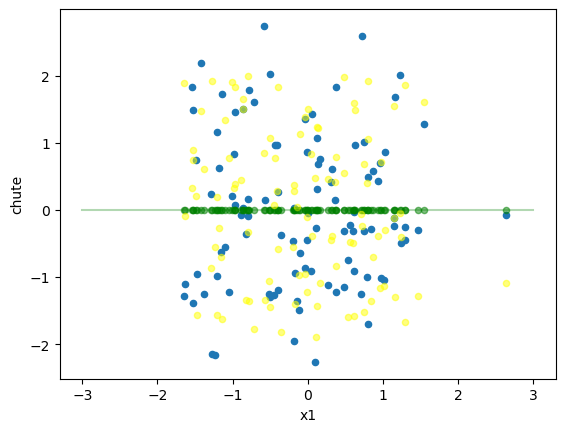

In [3]:
ax1 = df_pre.plot(kind='scatter', x='x1', y='x2')
ax2 = df_pre.plot(kind='scatter', x='x1', y='media', c='green', alpha=.5, ax=ax1)
ax3 = df_pre.plot(kind='scatter', x='x1', y='chute', c='yellow', alpha=.5, ax=ax1)
# linha da média
plt.plot([-3, 3], [0, 0], color='green', alpha=.3, linestyle='-')

In [4]:
mse_chute = mean_squared_error(df_pre['x2'], df_pre['chute'])
mse_media = mean_squared_error(df_pre['x2'], df_pre['media'])
print("Erro quadrado médio do chute: ", mse_chute)
print("Erro quadrado médio da média: ", mse_media)

Erro quadrado médio do chute:  2.6852845609757447
Erro quadrado médio da média:  1.272971791600099


## Criando o exemplo em código
Iniciamos com a importação das bibliotecas. As bibliotecas `pandas`, `numpy` e `matplotlib` são usados na grande maioria das tarefas de ML quando utilizamos a linguagem Python, portanto, aprender a utilizar essas bibliotecas é fundamental.
> Uma tarefa importante no estudo de machine learning é a criação de exemplos, tanto dos dados, quanto dos algoritmos. Ser capaz de construir um conjunto ficcional de dados é importante para a demonstração de técnicas de implementação, e construir os algoritmos a partir do zero é importante para desenvolver a intuição por trás dos algoritmos.

In [5]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree # implementação de árvore de decisão do sklearn

In [6]:
# Usando a distribuição normal para gerar dados aleatórios
velocidade = np.random.normal(10, 1.5, 100)
resistencia = np.random.normal(10, 3, 100)
potencia = np.random.normal(70, 15, 100)
df = pd.DataFrame({'velocidade': velocidade, 'resistencia': resistencia, 'potencia': potencia})
df.head()

,velocidade,resistencia,potencia
0,8.768830,11.478366,85.983580
1,10.147010,3.573466,59.868508
2,5.649547,8.877474,55.819553
3,7.683906,14.576743,69.378273
4,11.757553,11.485474,79.324297


In [7]:
print(df.describe())

       velocidade  resistencia    potencia
count  100.000000   100.000000  100.000000
mean     9.978086     9.855444   68.073298
std      1.650571     3.422615   15.718015
min      5.649547     2.731375   29.151635
25%      9.054409     7.244494   58.852020
50%      9.789098     9.953888   68.862007
75%     11.038991    12.088443   77.736657
max     15.585344    19.468530  112.136563


Para criar a etiqueta dos dados, adicionamos uma nova coluna chamada `aptidao`, e fazemos a anotação manual de cada observação.

> Para este exemplo os dados serão pseudo-anotados, mas em um contexto de negócios real de negócio, outras técnicas são empregadas para realizar a anotação, como a anotação por um especialista de domínio, uma rede neural, ou um algoritmo não-supervisionado.

Como a magnitude das variáveis é muito diferente, normalizamos os dados

In [8]:
# normalizando os dados
normal_df = (df-df.mean())/df.std()

# mapeando os resultados com uma categoria de esporte
dict_map = {
    "velocidade": "atletismo",
    "resistencia": "futebol",
    "potencia": "fisiculturismo"
}

# criando a etiqueta
df['aptidao'] = normal_df.idxmax(axis=1).map(dict_map)
normal_df.head()

,velocidade,resistencia,potencia
0,-0.732629,0.474176,1.139475
1,0.102342,-1.835432,-0.521999
2,-2.622450,-0.285738,-0.779599
3,-1.389931,1.379442,0.083024
4,1.078092,0.476253,0.715803


## Aplicando ML para prever os resultados - Árvore de Decisão

Agora que já tratamos os nossos dados fictícios, podemos aplicar um algoritmo de ML real para comparar com os resultados obtidos através de chutes e através da simples média. Aqui vamos usar a árvore de decisão implementada na biblioteca `sklearn`.

As árvores de decisão são modelos da família CART (Classification And Regression Trees), e, como o nome diz, podem ser usadas tanto para tarefas de regressão quanto para tarefas de classificação.

> Pergunta rápida: Estamos diante de uma tarefa de classificação ou de regressão?

In [9]:
from sklearn.model_selection import train_test_split

# Fazendo o split entre base de treino e base de teste
y_train, y_test = train_test_split(df, test_size=.25)
resultado_original = y_test['aptidao']
y_test.drop("aptidao", axis=1, inplace=True)

# Criando o objeto classificador
clf = tree.DecisionTreeClassifier()

# Ajustando o modelo aos dados
clf = clf.fit(y_train[['velocidade', 'resistencia', 'potencia']], y_train['aptidao'])

# Fazendo a previsão
y_pred = clf.predict(y_test)
y_test['resultado_original'] = resultado_original
y_test['predicao_dt'] = y_pred
y_test.head()

,velocidade,resistencia,potencia,resultado_original,predicao_dt
32,9.094724,12.179094,41.016112,futebol,futebol
40,8.424087,12.324841,56.091108,futebol,futebol
2,5.649547,8.877474,55.819553,futebol,futebol
16,12.321578,6.392920,75.838691,atletismo,atletismo
95,9.578378,9.251328,81.892653,fisiculturismo,atletismo


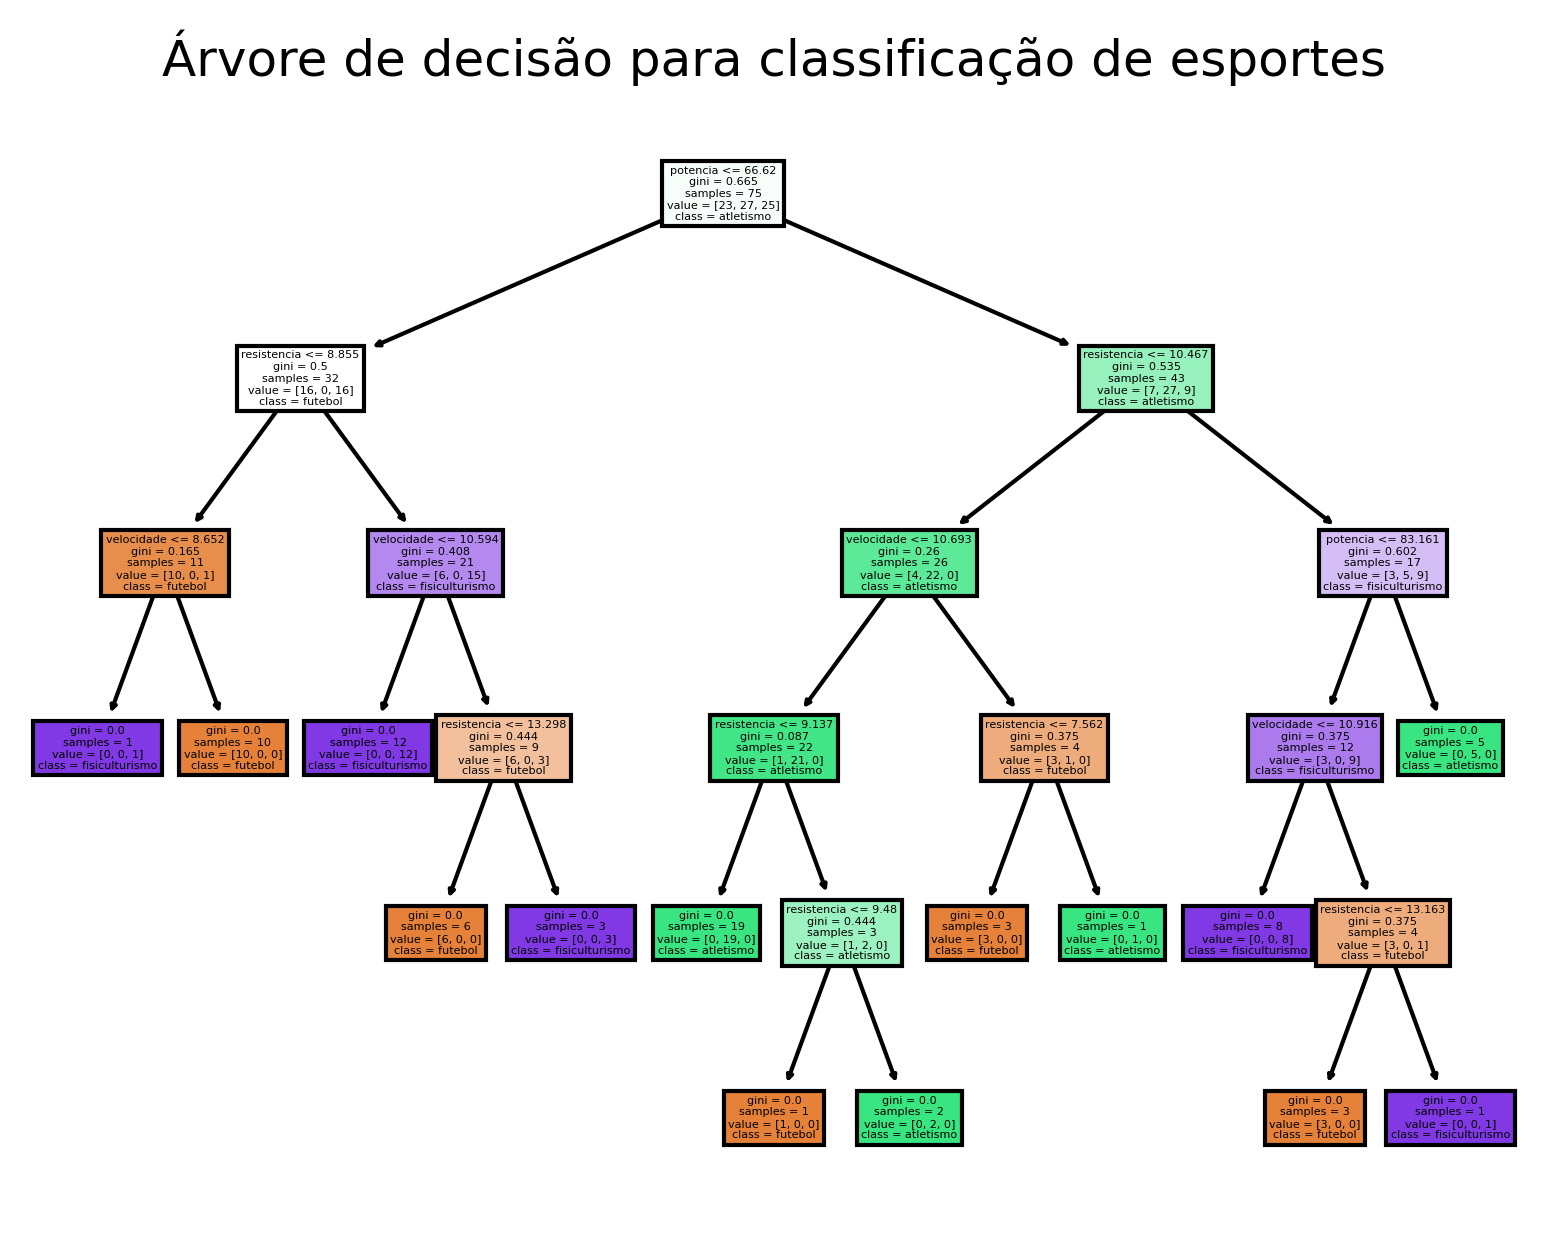

In [10]:
# visualização da árvore
plt.figure(dpi=300)
tree.plot_tree(clf, class_names=y_test.resultado_original.unique(), feature_names=y_test.columns[:-2], filled=True)
plt.title("Árvore de decisão para classificação de esportes")
plt.show()

Podemos comparar o nosso modelo com o Zero Rule Algorithm (ZeroR - escolhe a categoria mais frequente), e um modelo de escolha aleatória. No código abaixo criamos essas "predições".

In [11]:
y_test['ZeroR'] = y_train.aptidao.value_counts().idxmax()
y_test['chute'] = np.random.choice(["futebol", "fisiculturismo", "atletismo"], len(y_test))
y_test.head()

,velocidade,resistencia,potencia,resultado_original,predicao_dt,ZeroR,chute
32,9.094724,12.179094,41.016112,futebol,futebol,fisiculturismo,futebol
40,8.424087,12.324841,56.091108,futebol,futebol,fisiculturismo,atletismo
2,5.649547,8.877474,55.819553,futebol,futebol,fisiculturismo,futebol
16,12.321578,6.392920,75.838691,atletismo,atletismo,fisiculturismo,futebol
95,9.578378,9.251328,81.892653,fisiculturismo,atletismo,fisiculturismo,futebol


In [12]:
from sklearn import metrics

# Mostrando a precisão do modelo
print("Precisão (Decision Tree):", metrics.accuracy_score(y_test.resultado_original, y_test.predicao_dt))
print("Precisão (ZeroR):", metrics.accuracy_score(y_test.resultado_original, y_test.ZeroR))
print("Precisão (Chute):", metrics.accuracy_score(y_test.resultado_original, y_test.chute))

Precisão (Decision Tree): 0.92
Precisão (ZeroR): 0.32
Precisão (Chute): 0.36


## Implementando o algoritmo manualmente
A estrutura de dados que melhor representa o algorimo é uma árvore binária. Na raiz da árvore temos todas as observações, e a cada nódulo, chamados de nódulos de decisão, os dados são divididos, com o objetivo de encontrar uma árvore onde cada folha contenha uma subdivisão _pura_ dos dados, quer dizer, numa tarefa de classificação, uma folha conterá um grupo onde todas as observações vão pertencer a mesma categoria.

### Definindo os valores de corte - Índice GINI
O objetivo principal do algoritmo é aprender com um conjunto de treinamento quais são as _regras de decisão_ que geram a árvore desejada. Existem duas medidas estatísticas principais para calcular a _regra de decisão_, o _ganho de informação_, e o _índice de impureza GINI_.

#### Ganho de informação
O ganho de informação deriva do conceito de entropia, que, em teoria da informação, é uma medida de impureza de uma amostra, cujos valores calculados variam entre 0 e 1. Em um grupo dividido em duas classes, caso metade das observações pertença a uma classe, e a outra metade pertença a outra classe, a entropia vai medir o maior valor, 1, uma vez que o grupo é o mais heterogêneo possível. Caso todas as amostrar pertençam a uma mesma classe, a entropia vai ser 0, uma vez que o grupo é totalmente homogêneo, ou puro.

A entropia é calculada através da seguinte fórmula:
$$Entropia(S)=-\sum_{c \in C}p(c)log_2p(c)$$
Onde:
* $S$ é o conjunto de dados
* $c$ é uma classe pertencente ao conjunto de dados
* $p(c)$ é a proporção de observações no conjunto de dados $S$ que pertence à classe $c$.

Para as árvores de decisão, cada regra de decisão vai ser aplicada com base na variável que apresente o menor valor de entropia. Para chegar a essa conclusão, calculamos o _ganho de informação_ gerado pela divisão (split), que é a diferença na entropia antes e depois da divisão. Esse procedimento pode ser descrito pela seguinte fórmula:
$$\text{Ganho de Informação}(S,a) = Entropia(S) - \sum_{v \in valores(a)}\frac{|S_v|}{|S|}Entropia(S_v)$$
Onde:
* $a$ é um atributo ou classe
* $Entropia(S)$ é a entropia do conjunto de dados total
* $\frac{|S_v|}{|S|}$ é a proporção dos valores de $S_v$ em relação a $S$
* $Entropia(S_v)$ é a entropia do conjunto de dados $S_v$

#### Impureza GINI (Mais eficiente)
O índice de impureza GINI é o método que vamos usar no nossso exemplo, e é o método empregado nos algoritmos CART. Esse índice calcula a probabilidade de classificar de maneira incorreta uma observação com base na distribuição de classes de um conjunto de dados.
> Imagine utilizar um seletor randômico, como random.choices, com pesos atribuidos de acordo com a distribuição das classes. O indice GINI calcula a probabilidade de o seletor fazer uma escolha errada.

A formula para calcular a impureza GINI é
$$G(S)=1-\sum_{i=1}^k(pi)^2$$

onde
* $p_i$ representa a probabilidade da classe $i$
* $k$ é o número de classes
* $S$ é um conjunto de dados

Note que por não precisar fazer cálculos logarítmicos, computacionalmente falando o índice GINI é mais eficiente do que o cálculo de ganho de informação, e também por isso é o nosso método escolhido para realizar as divisões na nossa árvore.


Como trabalhamos com variáveis preditoras contínuas, é preciso discretizar os valores para estabelecer um ponto de corte. A biblioteca sklearn utiliza um método estocástico (randômico) para fazer os cortes, mas nós vamos nos valer de outra técnica habitual que consiste em escolher os pontos intermediários entre cada ponto na base de dados $S$. Para cada ponto, vamos calcular o indice GINI, e faremos a divisão da base de dados na variável cujo resultado apresentar o melhor valor.


In [13]:
# Criando um vetor com os pontos de corte para a variavel velocidade
discretizacao_velocidade = y_train["velocidade"].rolling(window=2).mean()
discretizacao_velocidade.fillna(discretizacao_velocidade.mean(), inplace=True)
discretizacao_velocidade.head()

99    10.034984
62     8.791805
5      9.421059
88    10.620305
51    11.273810
Name: velocidade, dtype: float64

In [14]:
# Criando um vetor com os pontos de corte para a variavel resistencia
discretizacao_resistencia = y_train["resistencia"].rolling(window=2).mean()
discretizacao_resistencia.fillna(discretizacao_resistencia.mean(), inplace=True)
discretizacao_resistencia.head()

99     9.604372
62     6.727139
5      8.183813
88    10.286416
51    11.184878
Name: resistencia, dtype: float64

In [15]:
# Criando um vetor com os pontos de corte para a variavel potencia
discretizacao_potencia = y_train["potencia"].rolling(window=2).mean()
discretizacao_potencia.fillna(discretizacao_potencia.mean(), inplace=True)
discretizacao_potencia.head()

99    67.705033
62    77.312528
5     72.615882
88    71.607806
51    75.764852
Name: potencia, dtype: float64

In [16]:
def calcula_gini(y_train, variavel, ponto_corte):
    # Criando uma cópia do dataframe
    df = y_train.copy()
    # Criando uma coluna com 0 e 1, sendo 0 para valores menores que o ponto de corte e 1 para valores maiores
    df["classe"] = np.where(df[variavel] < ponto_corte, 0, 1)
    # Calculando a probabilidade de cada classe
    prob_0 = df.classe.value_counts()[0]/len(df)
    prob_1 = df.classe.value_counts()[1]/len(df)
    # Calculando o gini
    gini = 1 - (prob_0**2 + prob_1**2)
    return gini

# Calculando o gini para cada ponto de corte da variável velocidade
gini_velocidade = []
for i in discretizacao_velocidade:
    gini_velocidade.append(calcula_gini(y_train, "velocidade", i))

# Calculando o gini para cada ponto de corte da variável resistencia
gini_resistencia = []
for i in discretizacao_resistencia:
    gini_resistencia.append(calcula_gini(y_train, "resistencia", i))

# Calculando o gini para cada ponto de corte da variável potencia
gini_potencia = []
for i in discretizacao_potencia:
    gini_potencia.append(calcula_gini(y_train, "potencia", i))

# Criando um dataframe com os resultados
df_gini = pd.DataFrame({"velocidade": discretizacao_velocidade, "gini_velocidade": gini_velocidade,
                        "resistencia": discretizacao_resistencia, "gini_resistencia": gini_resistencia,
                        "potencia": discretizacao_potencia, "gini_potencia": gini_potencia})

df_gini.sort_values(by="gini_velocidade").head()

,velocidade,gini_velocidade,resistencia,gini_resistencia,potencia,gini_potencia
9,13.106583,0.051911,6.370554,0.303644,46.513036,0.147200
78,7.380727,0.100978,9.648953,0.499911,64.752167,0.467911
25,7.550999,0.100978,13.969248,0.190578,72.337844,0.452978
6,12.266888,0.100978,9.603906,0.499200,80.369638,0.286578
72,12.483841,0.100978,7.361317,0.435200,62.018772,0.435200


In [17]:
# Calculando o menor gini para cada variável
min_gini_velocidade, min_gini_resistencia, min_gini_potencia = df_gini.gini_velocidade.min(), df_gini.gini_resistencia.min(), df_gini.gini_potencia.min()
# O melhor corte é o que tem o menor gini
min_gini = min(min_gini_velocidade, min_gini_resistencia, min_gini_potencia)

print("O menor gini para velocidade é:", min_gini_velocidade)
print("O menor gini para resistencia é:", min_gini_resistencia)
print("O menor gini para potencia é:", min_gini_potencia)

# Mostrando as observações que possuem o menor gini
match = df_gini[df_gini.isin([min_gini]).any(axis=1).dropna()]
var_corte = df_gini[df_gini.isin([min_gini])].idxmax(1).dropna().values[0].split("_")[1]

match

O menor gini para velocidade é: 0.05191111111111102
O menor gini para resistencia é: 0.05191111111111102
O menor gini para potencia é: 0.07679999999999998


,velocidade,gini_velocidade,resistencia,gini_resistencia,potencia,gini_potencia
9,13.106583,0.051911,6.370554,0.303644,46.513036,0.147200
0,8.015048,0.190578,15.473448,0.051911,80.364163,0.286578
65,9.603328,0.484978,3.314872,0.051911,69.280184,0.499200


In [18]:
# Mostrando o valor de corte (threshold)
var_corte = df_gini[df_gini.isin([min_gini])].idxmax(1).dropna().values[0].split("_")[1]
valor_corte = match[var_corte].values[0]
valor_corte
# valor_corte.split("_")[1]
# valor_corte

13.106582734514895

In [19]:
y_train.where(y_train[var_corte] <= valor_corte).dropna()

,velocidade,resistencia,potencia,aptidao
99,8.353917,7.087284,72.271390,fisiculturismo
62,9.229693,6.366994,82.353666,fisiculturismo
5,9.612425,10.000633,62.878097,futebol
88,11.628186,10.572200,80.337515,atletismo
51,10.919433,11.797556,71.192189,atletismo
...,...,...,...,...
39,9.455412,6.555839,61.968857,atletismo
15,11.624285,15.706475,47.656073,futebol
36,9.513599,5.718015,72.130615,fisiculturismo
81,10.355466,15.088199,51.645020,futebol


In [20]:
y_train.where(y_train[var_corte] > valor_corte).dropna()

,velocidade,resistencia,potencia,aptidao
70,13.566151,12.359561,55.843216,atletismo
9,15.585344,3.000716,54.949050,atletismo


Separaremos a base de dados em dois grupos, o primeiro conterá observações onde `variavel <= limite` e o segundo, os demais.

In [21]:
# Aplicando a regra de decisão
split1_esquerda = y_train.where(y_train[var_corte] <= valor_corte).dropna()
split1_direita = y_train.where(y_train[var_corte] > valor_corte).dropna()

print(split1_direita)
print("\n---\n")
print(split1_esquerda)

    velocidade  resistencia   potencia    aptidao
70   13.566151    12.359561  55.843216  atletismo
9    15.585344     3.000716  54.949050  atletismo

---

    velocidade  resistencia   potencia         aptidao
99    8.353917     7.087284  72.271390  fisiculturismo
62    9.229693     6.366994  82.353666  fisiculturismo
5     9.612425    10.000633  62.878097         futebol
88   11.628186    10.572200  80.337515       atletismo
51   10.919433    11.797556  71.192189       atletismo
..         ...          ...        ...             ...
39    9.455412     6.555839  61.968857       atletismo
15   11.624285    15.706475  47.656073         futebol
36    9.513599     5.718015  72.130615  fisiculturismo
81   10.355466    15.088199  51.645020         futebol
23    9.183908     8.372368  98.983765  fisiculturismo

[73 rows x 4 columns]


In [22]:
# def calcula_gini(y_train, variavel, ponto_corte):
#     # Criando uma cópia do dataframe
#     df = y_train.copy()
#     # Criando uma coluna com 0 e 1, sendo 0 para valores menores que o ponto de corte e 1 para valores maiores
#     df["classe"] = np.where(df[variavel] < ponto_corte, 0, 1)
#     # Calculando a probabilidade de cada classe
#     prob_0 = df.classe.value_counts()[0]/len(df)
#     prob_1 = df.classe.value_counts()[1]/len(df)
#     # Calculando o gini
#     gini = 1 - (prob_0**2 + prob_1**2)
#     return gini

# Criando uma lista com os valores de corte para serem testados
def discretizar_variavel(df, variavel):
    discretizacao = df[variavel].rolling(window=2).mean()
    discretizacao.fillna(discretizacao.mean(), inplace=True)
    return discretizacao


# Calcula o melhor ponto de corte com base no GINI
def calcula_pontos_corte(df, y):
    df = df.copy()
    thresholds = pd.DataFrame([discretizar_variavel(df, variavel) for variavel in df.drop(y, axis=1).columns]).T
    gini_names = []
    for t in thresholds.columns:
        gini_var = f"gini_{t}"
        gini_names.append(gini_var)
        thresholds[gini_var] = thresholds[t].apply(lambda x: calcula_gini(df, t, x))
    
    idx_min = thresholds[gini_names].min(axis=1).idxmin()
    min_gini_var_name = thresholds[gini_names].min().idxmin()
    min_var_name = min_gini_var_name.split("_")[1]
    print(min_gini_var_name, idx_min)
    print(thresholds.loc[idx_min][[min_var_name, min_gini_var_name]])
    return thresholds.loc[idx_min][min_var_name], min_var_name


# Divide um dataset em dois com base em uma regra de decisão
def split(var_corte, valor_corte, df):
    split1_esquerda = df.where(df[var_corte] <= valor_corte).dropna()
    split1_direita = df.where(df[var_corte] > valor_corte).dropna()
    return split1_esquerda, split1_direita


In [23]:
y_train.aptidao.nunique()

3

In [24]:
# Criando a árvore de decisão
def arvore_decisao(df, y):
    if len(df) > 1:
        # Criando uma variável para armazenar o nome dos nós
        etiqueta = 0
        # A árvore será representada por um dict e inicia com um nó raiz contendo todas as observações do dataset
        arvore = {f"n{etiqueta}": {
            "var_corte": "",
            "ponto_corte": 0,
            "esquerda": None,
            "direita": None,
            "observacoes": df.index.values.tolist()
        }}
        # Usando as funções criadas anteriormente para calcular o ponto de corte e dividir o dataset
        ponto_corte, var_corte = calcula_pontos_corte(df, y)
        split1_esquerda, split1_direita = split(var_corte, ponto_corte, df)
        # Armazenando as informações do nó raiz
        arvore[f"n{etiqueta}"]["var_corte"] = var_corte
        arvore[f"n{etiqueta}"]["ponto_corte"] = ponto_corte
        arvore[f"n{etiqueta}"]["observacoes"] = df.index.values.tolist()
        if df[y].nunique() > 1:
            # Armazenando as informações do nó filho esquerdo
            etiqueta += 1
            arvore[f"n{etiqueta-1}"]["esquerda"] = arvore_decisao(split1_esquerda, y)
            # Armazenando as informações do nó filho direito
            etiqueta += 1
            arvore[f"n{etiqueta-2}"]["direita"] = arvore_decisao(split1_direita, y)
            return arvore
    return 0




In [25]:
y_train

,velocidade,resistencia,potencia,aptidao
99,8.353917,7.087284,72.271390,fisiculturismo
62,9.229693,6.366994,82.353666,fisiculturismo
5,9.612425,10.000633,62.878097,futebol
88,11.628186,10.572200,80.337515,atletismo
51,10.919433,11.797556,71.192189,atletismo
...,...,...,...,...
39,9.455412,6.555839,61.968857,atletismo
15,11.624285,15.706475,47.656073,futebol
36,9.513599,5.718015,72.130615,fisiculturismo
81,10.355466,15.088199,51.645020,futebol


In [26]:
arvore = arvore_decisao(y_train, "aptidao")
arvore

gini_velocidade 9
velocidade         13.106583
gini_velocidade     0.051911
Name: 9, dtype: float64
gini_resistencia 65
resistencia         3.314872
gini_resistencia    0.027022
Name: 65, dtype: float64
gini_velocidade 6
velocidade         12.266888
gini_velocidade     0.054012
Name: 6, dtype: float64
gini_resistencia 0
resistencia         15.473448
gini_resistencia     0.055510
Name: 0, dtype: float64
gini_velocidade 78
velocidade         7.380727
gini_velocidade    0.084343
Name: 78, dtype: float64
gini_velocidade 87
velocidade         6.648814
gini_velocidade    0.444444
Name: 87, dtype: float64
gini_velocidade 87
velocidade         6.956561
gini_velocidade    0.500000
Name: 87, dtype: float64
gini_potencia 80
potencia         97.577634
gini_potencia     0.088047
Name: 80, dtype: float64
gini_resistencia 1
resistencia         5.025693
gini_resistencia    0.120708
Name: 1, dtype: float64
gini_velocidade 1
velocidade         10.624621
gini_velocidade     0.375000
Name: 1, dtype: float

{'n0': {'var_corte': 'velocidade',
  'ponto_corte': 13.106582734514895,
  'esquerda': {'n0': {'var_corte': 'resistencia',
    'ponto_corte': 3.3148724942767926,
    'esquerda': 0,
    'direita': {'n0': {'var_corte': 'velocidade',
      'ponto_corte': 12.266888376193805,
      'esquerda': {'n0': {'var_corte': 'resistencia',
        'ponto_corte': 15.473447773200517,
        'esquerda': {'n0': {'var_corte': 'velocidade',
          'ponto_corte': 7.380726653071523,
          'esquerda': {'n0': {'var_corte': 'velocidade',
            'ponto_corte': 6.648814098421288,
            'esquerda': 0,
            'direita': {'n0': {'var_corte': 'velocidade',
              'ponto_corte': 6.956560905410461,
              'esquerda': 0,
              'direita': 0,
              'observacoes': [87, 18]}},
            'observacoes': [87, 78, 18]}},
          'direita': {'n0': {'var_corte': 'potencia',
            'ponto_corte': 97.57763423973535,
            'esquerda': {'n0': {'var_corte': 'resistenci

In [ ]:
y_train

,velocidade,resistencia,potencia,aptidao
28,8.918455,5.660526,95.317028,fisiculturismo
84,10.614400,7.748517,70.644882,atletismo
14,10.487109,10.951963,85.846635,fisiculturismo
98,8.772881,11.893477,62.013571,futebol
81,11.458798,8.606472,75.982142,atletismo
...,...,...,...,...
74,8.270061,15.325950,80.645522,futebol
8,9.898034,8.944130,72.148453,fisiculturismo
61,9.918841,12.806045,75.211815,futebol
9,8.791596,11.470268,83.228225,fisiculturismo
